In [285]:
#Step 1
import pandas as pd
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

import matplotlib.pyplot as plt




#Load the `Titanic.csv` Data


In [286]:
titanic = pd.read_csv('Titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Step 3: Split the Data

The next step is to separate the target column from the feature matrix and perform a train/test split. 

*   What is the target and what are the features in the data?
*   Are there any features that you want to drop?
*   Is there any feature engineering that you need to do?

**Note**: Use comments in your code and text blocks to explain your decisions and results.

 

In [287]:
#Step 3
y = titanic['Survived'].values.ravel()
X = titanic.drop(columns=['PassengerId',	'Survived','Name','Ticket','Cabin'],axis=1)

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [288]:
categ = ['Embarked','Sex','Pclass','SibSp','Parch']

In [289]:
cat = pd.get_dummies(X['Embarked'])
X1 = pd.concat([X,cat],axis=1)
X = X1.drop(columns=['Embarked'],axis=1)
print(X.columns)



Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S'], dtype='object')


In [290]:
cat = pd.get_dummies(X['Sex'])
X1 = pd.concat([X,cat],axis=1)
X = X1.drop(columns=['Sex'],axis=1)
print(X.columns)


Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'female',
       'male'],
      dtype='object')


In [291]:
cat = pd.get_dummies(X['Pclass'])
X1 = pd.concat([X,cat],axis=1)
X = X1.drop(columns=['Pclass'],axis=1)
X = X.rename(columns={1:'1st class',2:'2nd class', 3:'3d class'})
print(X.columns)

Index(['Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'female', 'male',
       '1st class', '2nd class', '3d class'],
      dtype='object')


In [292]:
X.shape

(891, 12)

In [293]:
X.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'female', 'male',
       '1st class', '2nd class', '3d class'],
      dtype='object')

#Step 4: Clean and Preprocess the Data

Use the code block below to clean and preprocess your data. Some considerations you may want to think about include the following:  
*  Are there any missing values that need to be imputed?
*  Do you need to encode any categorical features?
*  Do you need to standardize any quantitative features?
 
**Note**: Use comments in your code and text blocks to explain your decisions and results.

 

In [294]:
#Step 4
X.isna().sum()

Age          177
SibSp          0
Parch          0
Fare           0
C              0
Q              0
S              0
female         0
male           0
1st class      0
2nd class      0
3d class       0
dtype: int64

In [295]:
X['Age'].value_counts()



24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)


#Step 5: Build the Baseline Model

Ideally, you will want to set a baseline algorithm to build off of. The most logical start is *linear regression* for *regression* and *logistic regression* for *classification*, as they are the basis for their respective algorithms.

Once you have the baseline set, you will want to choose an algorithm that surpasses the baseline.

Select a baseline model and fit it to your data.

**Note**: Use comments in your code and text blocks to explain your decisions and results.



In [297]:
# Step 5
lg = Pipeline([('imp',SimpleImputer()),('sc',StandardScaler()),('model',LogisticRegression())])

lg.fit(X_train,y_train)



Pipeline(steps=[('imp', SimpleImputer()), ('sc', StandardScaler()),
                ('model', LogisticRegression())])

In [298]:
scores = cross_val_score(lg, X_train, y_train, cv=10)
scores.mean()

0.8188828584350972

# Let us use DecisionTree algorithm: 

In [299]:


dtree = Pipeline([('imp',SimpleImputer(missing_values=np.nan, strategy='mean')),('sc',StandardScaler()),
                  ('model', DecisionTreeClassifier())])
dtree.fit(X_train,y_train)


Pipeline(steps=[('imp', SimpleImputer()), ('sc', StandardScaler()),
                ('model', DecisionTreeClassifier())])

In [300]:
scores = cross_val_score(dtree, X_train, y_train, cv=10)

print('DecisionTree accuracy:',scores.mean())

print(scores.mean())
print(scores.std())

DecisionTree accuracy: 0.7769335142469471
0.7769335142469471
0.040894856111526434


In [301]:

rforest = Pipeline([('imp',SimpleImputer(missing_values=np.nan, strategy='mean')),('sc',StandardScaler()),
                    ('model',RandomForestClassifier())])
rforest.fit(X_train,y_train)

Pipeline(steps=[('imp', SimpleImputer()), ('sc', StandardScaler()),
                ('model', RandomForestClassifier())])

In [302]:
scores = cross_val_score(rforest, X_train, y_train, cv=10)

print('Random Forest accuracy:', scores.mean())


Random Forest accuracy: 0.839846223428313


In [303]:
gradboost = Pipeline([('imp',SimpleImputer(missing_values=np.nan, strategy='mean')),('sc',StandardScaler()),
                  ('model', GradientBoostingClassifier())])
gradboost.fit(X_train,y_train)
scores = cross_val_score(gradboost, X_train, y_train, cv=10)


print('GradientBoostClassifier:',scores.mean())



GradientBoostClassifier: 0.8202623247399365


In [304]:

AdaB     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('Gradient', AdaBoostClassifier(random_state=42))])

AdaB.fit(X_train, y_train)

scores = cross_val_score(AdaB, X_train, y_train, cv=10)

print('AdaBoostClassifier',scores.mean())

AdaBoostClassifier 0.817412935323383


In [305]:
KNNpipe = Pipeline([("imp_mean", SimpleImputer(missing_values=np.nan, strategy="mean")), 
                 ("scaler", StandardScaler()), 
                 ("KNN", KNeighborsClassifier())])
KNNpipe.fit(X_train, y_train)

KNNpipe.score(X_train, y_train)


0.8607784431137725

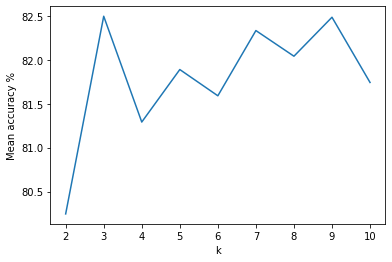

In [308]:
# Printing the mean accuracy for different values of neibours

mean_accuracy = []

for i in list(range(2,13)):
  KNNpipe     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                       ('scaler', StandardScaler()), 
                     ('KNN', KNeighborsClassifier(n_neighbors=i))])

  KNNpipe.fit(X_train, y_train)
  KNNscores = cross_val_score(KNNpipe, X_train, y_train, cv=10)
  mean_accuracy.append(KNNscores.mean())


k_df = pd.DataFrame(k)
k_df.rename({0:'k'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['k'], to_plot['mean accuracy'])
plt.xlabel('k')
plt.ylabel('Mean accuracy %')
plt.show()


In [309]:
KNNpipe = Pipeline([("imp_mean", SimpleImputer(missing_values=np.nan, strategy="mean")), 
                 ("scaler", StandardScaler()), 
                 ("KNN", KNeighborsClassifier(n_neighbors=3))])
KNNpipe.fit(X_train, y_train)

KNNpipe.score(X_train, y_train)


0.8862275449101796

In [311]:
KNNpipe = Pipeline([("imp_mean", SimpleImputer(missing_values=np.nan, strategy="mean")), 
                 ("scaler", StandardScaler()), 
                 ("KNN", KNeighborsClassifier(n_neighbors=9))])
KNNpipe.fit(X_train, y_train)

KNNpipe.score(X_train, y_train)

0.8488023952095808

#Final Reporting


In [312]:
# RandomForest gave us 83.5%, KNNClassifier 88.61%